# Intro to TD-Learning and Q-Learning algorithm

## Reinforcement Learning
![Reinforcement Learning](refs/rl_loop.png)

We don't have MDP, but we assume one. It means:
* known set of states: \\(s \in S\\)
* known set of actions (per state): \\(a \in A\\)
* **NOT** known model (transition function): \\(T(s,a,s')\\)
* **NOT** known reward function: \\(R(s,a,s')\\)

We can't use methods used to solve MDP (e.g. Value Iteration), because those needs model and reward function. Instead, we'll be learning from trial-and-error using samples \\((s,a,r',s')\\).

![Policy](refs/policy.png)

## Learning to predict
![Moor's law](refs/moores_law.png)
In the past, scientists believed that AI can be solved by "strong" methods (incomporating human insight). Current accomplishments in Deep Learning shows that **"weak" general-purpose methods are the right way**. But that isn't all. To get the most from increasing computation power, we need methods that **scale with computation** e.g. supervised learning scales weakly, because we need labeled data.

**Prediction learning** is general-purpose and scalable in one. You have a target just by waiting, so there is no need for human labeling.

## Temporal-difference learning is a method for learning to predict

It is used in Reinforcement Learning to predict future reward. TD-Learning is behind e.g. Q-Learning algorithm. It takes adventage of states' Markov property (it's predictions are based on only current state).

#### TD-Learning is learning a prediction from another, later, learned prediction.
It's like learning a guess from another guess. In short, it works thanks to one step look ahead.

$$V(S_{t}) \gets V(S_{t}) + \alpha [R_{t+1} + \gamma V(S_{t+1}) - V(S_{t})]$$

$$R_{t+1} + \gamma V(S_{t+1}) - V(S_{t}) - \text{TD error}$$

\\(\alpha\\) - learning rate  
\\(\gamma\\) - discount factor

## Table Q-Learning

#### Why it's better to learn Q-value?

Policy from value function:
$$\pi(s) = \argmax_{a}\sum_{s'}T(s,a,s')V(s')$$

It's better to learn Q-value, because we don't need a model to get a policy:
$$\newcommand{\argmax}{\arg\max} \pi(s) = \argmax_{a}Q(s,a)$$

#### Q-Learning is:
* model-free
* off-policy

$$Q(s,a) \gets Q(s,a) + \alpha [r + \gamma \max_{a'} Q(s',a') - Q(s,a)]$$

[2017-10-02 19:35:05,135] Making new env: FrozenLake-v0


OpenAI Gym FrozenLake:
SFFF (S: starting point, safe)
FHFH (F: frozen surface, safe)
FFFH (H: hole, fall to your doom)
HFFG (G: goal, where the frisbee is located)

Average score over all episodes: 0.301

Final Q-Table Values
[[  4.87930785e-02   9.79782595e-03   1.34577752e-02   2.18753753e-02]
 [  5.73013371e-03   1.16070721e-03   5.39143043e-04   1.70636379e-01]
 [  2.24842080e-02   4.09209590e-03   6.60626865e-03   9.52457326e-02]
 [  1.14001987e-03   1.22472192e-02   5.92213801e-04   7.05023817e-02]
 [  8.19558792e-02   8.76174852e-03   2.17943838e-04   2.09388806e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.78124164e-04   4.59690222e-04   6.41925091e-03   7.37228111e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.35095648e-04   3.42327579e-04   8.15190729e-05   2.99668715e-01]
 [  2.08867023e-03   2.01181195e-01   3.75398793e-04   1.62121576e-04]
 [  5.78908212e-02   1.21253651e-03   5.59416534e-05   5.9256314

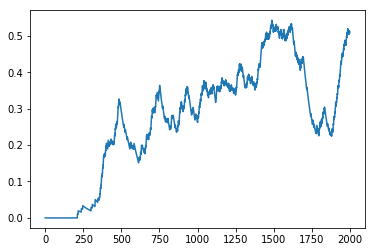

In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('FrozenLake-v0')

# Initialize Q-table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])

# Set learning hiperparameters
lr = .8
y = .95
num_episodes = 2000

# Create list to store rewards
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    s = env.reset()
    done = False
    rSum = 0

    #The Q-Table learning algorithm
    for _ in range(99):
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(10./(i+1)))
        
        #Get new state and reward from environment
        s1,r,done,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        
        rSum += r
        s = s1
        if done == True:
            break
    rList.append(rSum)

# Calculate list of running averages
rRunTmp = .0
rRun = []
for r in rList:
    rRunTmp =  r / 100 + rRunTmp * 99 / 100
    rRun.append(rRunTmp)
plt.plot(rRun)
    
print("OpenAI Gym FrozenLake:")
print("SFFF (S: starting point, safe)")
print("FHFH (F: frozen surface, safe)")
print("FFFH (H: hole, fall to your doom)")
print("HFFG (G: goal, where the frisbee is located)")
print("")
print("Average score over all episodes: {}".format(sum(rList)/num_episodes))
print("")
print("Final Q-Table Values")
print(Q)

In [6]:
# Set number of validation episodes
num_episodes = 1000

# Create list to store rewards
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    s = env.reset()
    done = False
    rSum = 0

    #The Q-Table learning algorithm
    for _ in range(99):
        #Choose an action by greedily picking from Q table
        a = np.argmax(Q[s,:])
        
        #Get new state and reward from environment
        s1,r,done,_ = env.step(a)
        
        rSum += r
        s = s1
        if done == True:
            break
    rList.append(rSum)

print("Average score over all episodes: {}".format(sum(rList)/num_episodes))

Average score over all episodes: 0.61


### References:
* [Deep Learning and Reinforcement Learning Summer School 2017, "TD Learning" speech by R. Sutton](http://videolectures.net/deeplearning2017_sutton_td_learning/)
* [Berkeley CS188, "Reinforcement Learning I/II" lecture by 
Pieter Abbeel](http://ai.berkeley.edu/lecture_videos.html)
* [Simple Reinforcement Learning with Tensorflow Part 0: Q-Learning with Tables and Neural Networks](https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0)